<h1 style="text-align: center;">Experiment-4</h1>
<h1 style="text-align: center;">Logistic Regression</h1>

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors.
Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 otherwise it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

<h4>Logistic Function – Sigmoid Function</h4>
The sigmoid function is a mathematical function used to map the predicted values to probabilities.
It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the “S” form.
The S-form curve is called the Sigmoid function or the logistic function.
In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the datasets
df = pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [7]:
# Define or import plot_data()
def plot_data(X, y, pos_label="Positive", neg_label="Negative"):
    pos = np.where(y == 1)[0]  # Indices where y == 1
    neg = np.where(y == 0)[0]  # Indices where y == 0
    plt.scatter(X[pos, 0], X[pos, 1], marker='o', label=pos_label)
    plt.scatter(X[neg, 0], X[neg, 1], marker='x', label=neg_label)

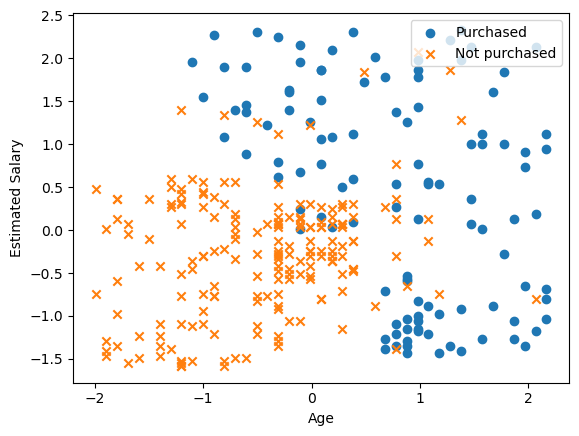

In [8]:
# Plot examples
plot_data(X_Train, Y_Train[:], pos_label="Purchased", neg_label="Not purchased")

# Set the y-axis label
plt.ylabel('Estimated Salary') 
# Set the x-axis label
plt.xlabel('Age') 
plt.legend(loc="upper right")
plt.show()

In [9]:
# Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [10]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False) 

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [11]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [12]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

<Axes: >

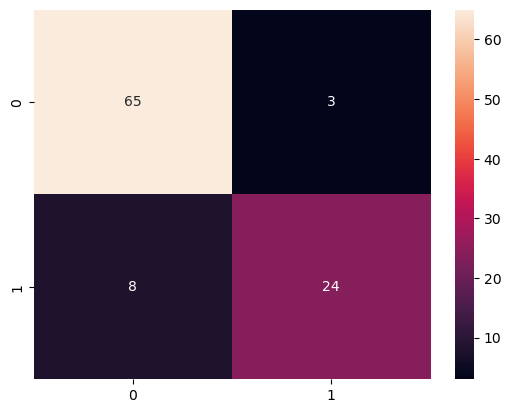

In [13]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

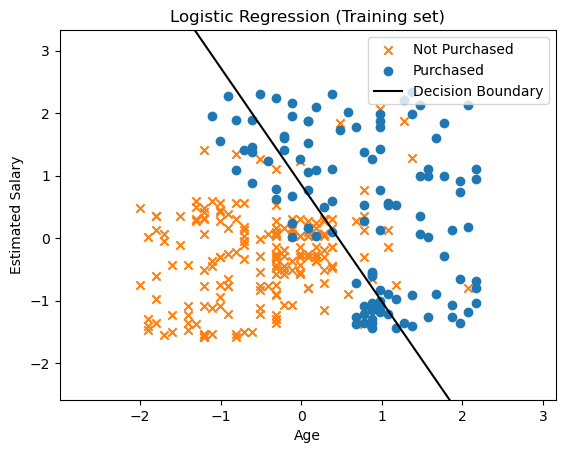

In [33]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_Train, Y_Train 

x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

# Plot decision boundary
# plt.contourf(
#     x1, x2,
#     classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
#     alpha = 0.75,
#     cmap = ListedColormap(('orange','blue'))
# ) 

# Set axis limits
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

# Plot actual data points with correct markers
for i, j in enumerate(np.unique(y_set)):  
    if j == 1:  # Purchased (Class 1)
        marker = 'o'  # Circle
    else:  # Not Purchased (Class 0)
        marker = 'x'  # Cross

    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c=('#ff7f0e' if j == 0 else '#1f77b4'),
        marker=marker,  
        label="Purchased" if j == 1 else "Not Purchased"
    ) 

# Generate points for the decision boundary line
x_values = np.linspace(X_Train[:, 0].min(), X_Train[:, 0].max(), 100)  # Age (X-axis)
y_values = -(theta[0] * x_values + intercept) / theta[1]  # Solve for Estimated Salary (Y-axis)

# Plot the regression decision boundary
plt.plot(x_values, y_values, 'k-', label="Decision Boundary")

plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

In [34]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(Y_Test, Y_Pred)
accuracy

0.89